<a href="https://colab.research.google.com/github/nataliacalado/portfolio/blob/master/Projeto_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning: Será que você sobreviveria ao naufrágio do Titanic?**#

Neste artigo vamos fazer uma análise exploratória de dados e a construção de um modelo de Machine Larning referente a maior competição do site Kanggle, [***Titanic: Machine Learning from Distaster***](https://https://www.kaggle.com/c/titanic).

#**Primeiros passos**

Antes de começarmos esse projeto vamos criar primeiro um checklist com algumas etapas que precisamos seguir para fazer essa análise de forma assertiva.

Para esse desafio vamos seguir as seguintes etapas:

1.   **Definição do Problema**
2.   **Obtenção dos Dados**
3.   **Exploração dos Dados**
4.   **Preparação dos Dados**
5.   **Modelagem**
6.   **Avaliação**




#**1. Definição do Problema**

##**1.1 A História**

O RMS Titanic era um navio britânico do século XX projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção iniciou no dia 31 de março de 1909 e foi lançado ao mar em maio de 1911. Pronto ele tinha 269 m de comprimento, 53,3 m de altura e 46.328 toneladas brutas e sua capacidade total era prevista para 3.547 passageiros.

Sua construção foi pensada para ser o maior navio, mais luxuoso e mais seguro de todos e a quem dizia que era "inafundável".

O Titanic chegou ao porto em 03 de abril de 1912 e no dia 10 do mesmo mês os passageiros começaram a embarcar para a viagem inaugural, que iria da Southampton, na Inglaterra, a Nova York, nos EUA.

No dia 14 às 23h40, houve a colisão. O iceberg foi visto muito tarde para ser tomada qualquer ação para evitar esse desastre e mesmo com todas as tentativas possíveis para o desvio, o choque foi inevitável. Mas ao contrário do que muitos pensam, o impacto não causou um rasco no casco e sim um rompimento dos rebites entre as chapas, que chegou a mais de 60 m de comprimento.

O capitão do navio Edward Smith chegou a ponte de controle logo que soube do ocorrido e ordenou o fechamento das comportas que dava para as caldeiras e para o motor para poder isolar uma possível inundação dessas áreas e solicitou que alguns tripulantes fosse até o local para averiguar o estrago e as 23h50 ele já sabia o destino final do grandioso, luxuoso e seguro navio.

Vários pedidos de socorro foram enviados, o primeiro ás 00h10, código morse com um pedido de socorro foi enviado para um navio que estava a 93km do local e que chegou apenas as 04h10 e os outros foram os sinalizadores que foram vistos por uma embarcação próxima, mas que não se manifestou de nenhuma forma.

O fim já estava decretado para aquele navio, então as 00h45 os botes salva vidas começaram a ser lançados ao mar com os tripulantes, porém só tinham 20 unidades o suficiente para carregar 1.178 tripulantes das 2.224 que estavam no navio. Mas por conta do desespero e da falta de preparo para essa situação apenas 705 pessoas foram resgatadas.

Após o naufrágio total do Titanic apenas um bote voltou para tentar resgatar sobreviventes, onde encontrou apenas 04 pessoas e ficaram todos vagando pela escuridão até o navio Carpathia chegar e realizar o resgate que levou 4h para acontecer e no dia 18 enfim chegaram a Nova York.






##**1.2 O Desafio**#

No desafio é proposto que façamos um modelo preditivo que responda a seguinte pergunta:

*   Que tipo de pessoas têm maior probabilidade de sobreviver?

Com isso veremos se, os sobreviventes dessa tragédia tiveram apenas sorte ou tiveram outra influência? Além disso, no filme ficou bem evidente que a prioridade eram as crianças, mulheres e idosos, será que realmente isso aconteceu? E Jack e Rose, será que ambos sobreviveriam se estivessem em uma situação social diferente?







#**2. Obtenção dos Dados**

Para isso vamos realizar o download de dois arquivos de dados semelhantes que contém informações sobre os passageiros (train.csv e test.csv) e gerar um arquivo de previsão para nos ajudar a responder a pergunta proposta.

* **Dataset de treinamento (train.csv):** este dataset deverá ser utilizado para treinar o modelo de machine learning que iremos construir. Aqui temos algumas informações de alguns passageiros que estavam a bordo, inclusive se eles sobreviveram ou não.

* **Dataset de teste (test.csv):** esse conjunto de dados será utilizado para testarmos o desempenho do modelo nos dados não preenchidos que temos, ou seja, vamos ver se a previsão do modelo está sendo assertiva ou não.


#**3. Exploração dos Dados**

Essa é a principal etapa de todo o projeto e é aqui que vamos suar a camisa um pouco, cerca de 70% a 80% do nosso tempo será gasto nessa etapa, então prepare-se!!!

##**3.1 Conhecendo o Dataset**

Nessa etapa do projeto vamos realizar a importação dos datasets disponíveis, verificar quais informações temos, criar um dicionário de variáveis, verificar qual o tipo dessas variáveis, qual o percentual de valores nulos, verificar se existem ruídos ou outliers e por fim verificar qual o tipo de distribuição que encontramos.

Então bora começar!!!

In [0]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
%matplotlib inline

# importar bibliotecas do modelo de Machine Learning
from sklearn.tree import DecisionTreeClassifier

In [0]:
# importando os dados
train = pd.read_csv('https://raw.githubusercontent.com/nataliacalado/dataset/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/nataliacalado/dataset/master/test.csv')

In [4]:
# verificando a quantidade de entradas e de variáveis
linhas = train.shape[0]
colunas = train.shape[1]
print('Nº de linhas:',linhas)
print('Nº de colunas:',colunas)

Nº de linhas: 891
Nº de colunas: 12


Até agora descobrimos que nosso dataset train.csv possui um total de 12 variáveis e 891 entradas de dados. E quais são essas variáveis? De que tipo são?

É o que vamos descobrir agora....

###**3.1.1 Dicionários de Variáveis**

Para construirmos o nosso dicionário de variáveis teremos que descobrir o que tem em nosso DataFrame. Para isso vamos dar uma olhadinhas nas 05 primeiras entradas e começarmos a nos familiarizar com os dados.

In [5]:
# verificando as primeiras informações
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **PassengerId:** número de identificação de cada passageiro
* **Survival:** passageiros que sobreviveram (Sim = 1, Não = 0)
* **Pclass:** classe dos passageiros (1º Classe = 1, 2ª Classe = 2, 3ª Classe = 3)
* **Name:** nome dos passageiros
* **Sex:** sexo dos passageiros
* **Age:** idade dos passageiros
* **Sibsp:** nº de irmãos e cônjuges a bordo
* **Parch:** nº de pais e filhos a bordo
* **Ticket:** número do ticket de cada passageiro
* **Fare:** preço da passagem paga
* **Cabin:** número da cabine
* **Embarked:** local de embarque (Cherbourg = C, Queenstown = Q, Southampton = S)

Dicionário de variáveis criado, agora sim sabemos do que se tratam os dados. Mas agora precisamos descobrir de que tipo são esses dados e se existem ruídos e outliers para podermos tratar antes de começarmos a realizar as nossas análises.

In [6]:
# verificando o tipo de cada variável
display(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Existem três variáveis que possuem dados faltantes, porém a que mais trás impacto é a variável **Cabin**, com **77,1%** de seus dados faltantes. Após, temos a variável **Age** com **19,9%** de valores nulos e por fim temos a coluna **Embarked** com menos de **1%** sem informações.

In [7]:
# valores faltantes
(train.isnull().sum() / train.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

###**3.1.2 Começando as análises: Distribuição Estatística dos Dados**

Para começarmos a realizar algumas análises dos nossos dados, vamos utilizar o método *describe()* da biblioteca Pandas e plotar um histograma. Com isso vamos conseguir identificar possíveis outliers e descobrir qual a distribuição de cada variável. Esse processo é muito importante para podermos realizar as tratativas necessárias para realizar a limpeza dos dados e decidir qual será a melhor maneira de se fazer isso, se vamos excluir ou preencher com a média/mediana.

In [8]:
# distribuição estatística dos dados
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


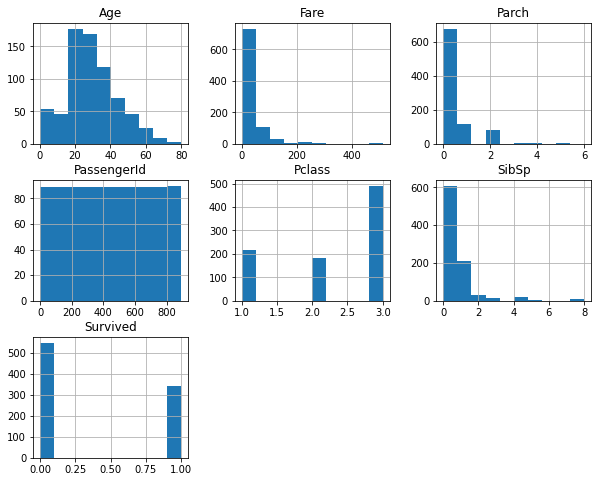

In [9]:
# plotando histograma para cada variável
train.hist(figsize = (10,8));

##**3.2 Respondendo algumas hipóteses: Quais grupos de pessoas tinham a maior chance de sobrevivência?**

Com os dados que temos já conseguimos responder algumas hipóteses lá do começo do artigo. Será que o sexo do passageiro influenciou na sobrevivência de cada um deles? 

Para verificarmos quais variáveis valem apena entrar para no modelo que iremos fazer ou até mesmo para podermos criar novas hipóteses vamos olhar as correlações e os relacionamentos entre elas.

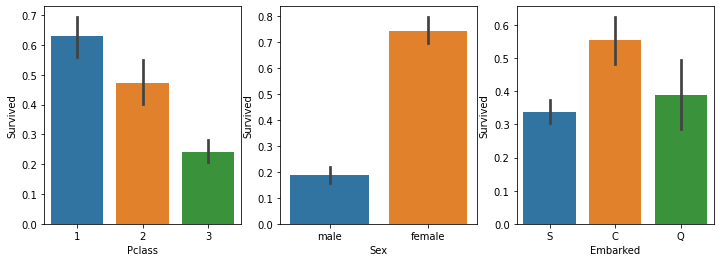

In [10]:
# plotar os dados das variáveis Survived x Pclass, Sex, Embarked
fig, (axis1,axis2,axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Pclass', y='Survived', data=train, ax=axis1)
sns.barplot(x='Sex', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

Através dos gráficos plotados conseguimos de cara já responder duas suposições:

1.   Os passageiros da 3º classe tiveram menos chances de sobreviver do que os passageiros da 1ª classe.
2.   As mulheres tiveram 75% de chance de sobrevivência comparado com os homens que tiveram somente 18%.

Agora vamos ver se a variável age teve alguma influência na sobrevivência.



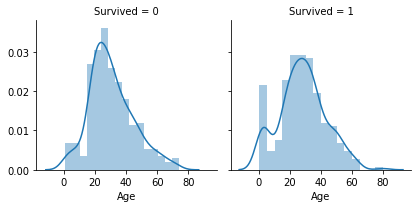

In [11]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot,'Age');

Lembram do filme Titanic? Onde após a tragédia a ordem era colocar nos botes salva-vidas primeiro as crianças e as mulheres?

Essa hipótese se confirma com os gráficos que plotamos acima. Apesar do comportamento da distribuição da idade ser relativamente parecidos, podemos perceber um pico dos sobreviventes quando se trata de crianças.

Agora, vamos ver um gráfico bem legal de se analisar e que nos mostra bastante coisa....

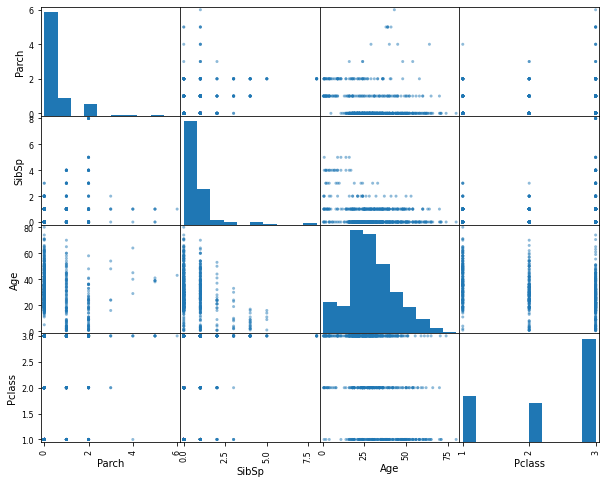

In [13]:
# plotar uma scatter_matrix
columns = ['Parch','SibSp','Age','Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(10,8));

Esse tipo de gráfico consegue nos mostrar muitas coisas. Quando olhamos na diagonal conseguimos ver por exemplo, a maior concentração de pessoas idosas estão na 1ª classe e quase não temos crianças.

Agora vamos dar uma olhada na correlação positiva e negativa entre as variáveis através do ***heatmap***.

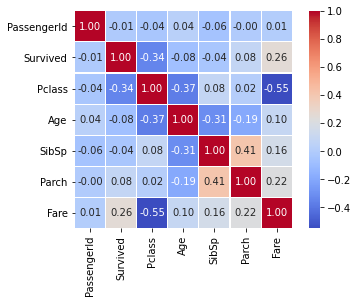

In [0]:
# plotando o heatmap para as variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True);

# **4. Preparação dos Dados**

Nesta etapa vamos realizar a junção dos dois arquivos disponibilizados para essa análise.

É importante realizar essa junção dos dados para aplicarmos o modelo de *Machine Learning* e após isso separarmos, pois atráves desse processo conseguimos aplicar um *feature engineering* e após trabalharmos em cima desse modelo conseguimos treina-lo fazendo com que o arquivo de teste se comporte da mesma maneira que o outro arquivo.




In [0]:
# salvar os datasets para recuperarmos depois
train_idx = train.shape[0]
test_idx = test.shape[0]

In [0]:
# salvar passengerId para submissão
passengerId = test['PassengerId']

In [0]:
# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

In [0]:
# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis = 0).reset_index(drop=True)

In [0]:
print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


Agora vamos selecionar quais as *features* vamos trabalhar o nosso modelo, ou seja, vamos descartar aquelas que aparentemente tem menos relevância. As variáveis que vamos desconsiderar serão as ***PassengerId, Name, Ticket*** e ***Cabin***.

As features que sobraram para o nosso modelo para serem tratadas e preparadas são as ***Pclass, Sex, Age, SibSp, Parch, Fare*** e ***Embarked.*** 

In [0]:
# excluindo as variáveis PassengerId, Name, Ticket e Cabin
df_merged.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1, inplace=True)

## **4.1 Tratativa para os valores faltantes**

Nessa próxima etapa vamos verificar quais são os valores faltantes para cada variável e iremos tratar os campos vazios.

A tratativa escolhida para esses campos faltantes será a de completa-los com média, mediana ou maior frequência, para cada variável será adotado um dos métodos que para mim é o que melhor se encaixa.

Abaixo vemos que temos apenas as colunas Age, Fare e Embarked com campos ausentes.

In [0]:
# verificando quais variáveis possuem valores nulos
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Para as variáveis Age e Fare irei preencher com a mediana e para a variável do Embarked irei preencher com a maior frequencia.

In [0]:
# Age: completando os campos nulos com a mediana
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

In [0]:
# Fare: completando os campos nulos com a mediana
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

In [0]:
# Embarked: completando os campos nulos com a maior frequencia
embarked_max = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_max, inplace=True)

## **4.2 Preparando as variáveis para o modelo**

Para podermos aplicar um modelo matemático precisamos ter todos os dados numéricos e para isso precisamos transformar o formato de algumas variáveis que estão como categórica.

A primeira variável que vamos transformar será a coluna ***Sex***, pois como vimos nas primeiras entradas do DataFrame ela possui informações de **['Male' , 'Female']**. Então, vamos transformar essas informações em binário **'Male' = 1 e 'Female' = 0**.

A segunda variável é a ***Embarked***, aqui vamos aplicar o conceito de variáveis *dummies*, ou seja, para cada valor possível da variável categórica será criado uma nova coluna com os valores 0 e 1.

In [0]:
# tratando a variável Sex: valores binários
df_merged['Sex'] = df_merged['Sex'].map({'male': 1, 'female': 0})

# tratando a variável Embarked: variável dummy
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,0,1


Agora que fizemos todas as tratativas que precisavamos vamos separar o *DataFrame* **df_merged** nos arquivos iniciais ***train e test***. 

In [0]:
# separando o arquivo df_merged nos arquivos iniciais train e test
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

# **5. Construção do modelo e avaliações**

Agora sim, depois de realizada as análises exploratórias dos dados e as tratativas vamos montar nosso modelo de **Machine Learning**.

Para esse caso irei realizar o modelo de Árvore de Decisão.



In [0]:
# criando o modelo de Árvore de Decissão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train,target)

# verificando a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decissão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decissão: 82.72


Com esse modelo conseguimos uma acurácia de quase 83%, o que é muito bom.

Agora vamos submeter o modelo criado no Kaggle e ver o resultado...

In [0]:
# submetendo o modelo no Kaggle
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar o arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

Como eu já imaginava, após submeter o treino no Kaggle a acurácia do modelo construído deu 78%, o que é normal de acontecer, uma vez que o modelo construído foi realizado através de um dataset de treino.

# **6. Será que eu sobreviveria ao desastre do Titanic?**

Depois de construir o modelo posso finalmente matar a minha curiosidade e saber se eu e minha família teríamos sobrevivido ao desastre.

Vou considerar que nessa viagem foram eu e meu marido, com isso consideramos que fomos viajar de 2ª classe, ambos com 29 anos, sem acompanhante, tendo pago o preço médio do ticket e embarcado no porto de Queenstown.

In [0]:
# declarando os valores das variáveis
natalia = np.array([2,0,29,1,0,32.2,0,0,1,0]).reshape((1,-1))
marcelo = np.array([2,1,29,1,0,32.2,0,0,1,0]).reshape((1,-1))

# verificar se nós teriamos sobrevividos
print("Natália:\t{}".format(tree_model.predict(natalia)[0]))
print("Marcelo:\t{}".format(tree_model.predict(marcelo)[0]))

Natália:	1
Marcelo:	0


Como vimos até agora, os homens foram os que menos tiveram chance de sobrevivência e o resultado da simulação mostra exatamente isso. Apenas eu sobreviveria ao naufrágio.